In [1]:
## Exploratory Data Analysis

import pandas as pd
import numpy as np

#import csv file from previous test file Magdy intro to python

csv_path="/resources/magdy_clean_data.csv"
df=pd.read_csv(csv_path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [2]:
#import visualization packages

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
diesel                 int64
gas                    int64
std                    int64
turbo                  int64
dtype: object

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


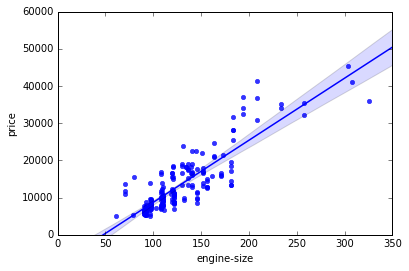

In [4]:
df.corr() # check correlation between variables

#visualize using scatter plot between engine size and price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

df[['engine-size','price']].corr() #check the correlatio between price and engine-size

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


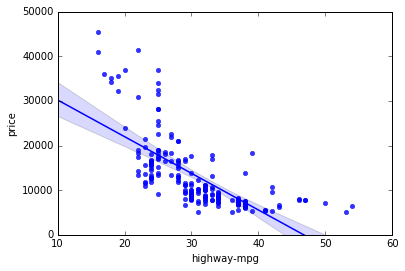

In [5]:
sns.regplot(x='highway-mpg',y='price', data=df) #Negative Linear relationship
plt.ylim(0,)

df[['highway-mpg', 'price']].corr() #check correlation

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


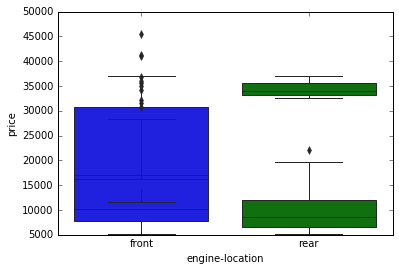

In [6]:
# Categorical variable
#These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. 
#The categorical variables can have the type "object" or "int64".

sns.boxplot(x='body-style',y='price', data=df) ## not a good indicator as they are overlapping (Bad indicator)
sns.boxplot(x='engine-location',y='price', data=df) ## check the engine location to the price (good indcator)



In [7]:
## Descriptive Analysis
df.describe() # by default skipps variables of type "object"
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,High
freq,32,115,94,118,198,145,157,92,115


In [8]:
df['drive-wheels'].value_counts().to_frame() # value_counts works only in pandas series not dataframe so we put only one "[]"
# we also used to_frame to put the output in a dataframe

#put it in a proper format
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

drive_wheels_counts.index.name = 'drive-wheels' # put name to index
drive_wheels_counts

#same for engine location
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)



,value_counts
engine-location,
front,198
rear,3


In [9]:
# Grouping
df['drive-wheels'].unique() # check the 3 unique values in the variable
df_group_one=df[['drive-wheels','body-style','price']] # put 3 columns in a new df

# grouping results of drive-wheels
df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

# grouping results of different variables
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

##we will put them in a pivot table to have a better representation and ease of use
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot
#For the time being will replace the nodata cells with 0 value
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with zero
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

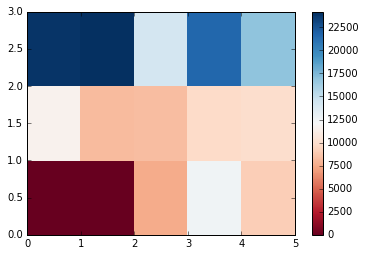

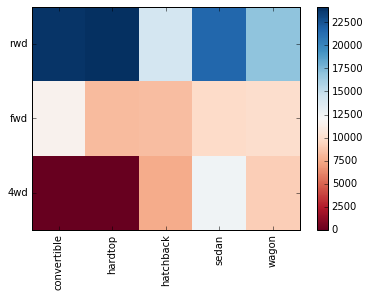

In [10]:
#Heat Map
#Visualize drive-wheels and body-style vs price
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show() ## plot is showing number in x and y axis and no labels

###########################################

fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


In [11]:
#Pearson correlation
df.corr()

# we can get the p-values and stats in scipy library
from scipy import stats

#calcualte pearson coeffecienta and P-value for wheel-base vs price
pearson_coef, p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
#same for horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 



The Pearson Correlation Coefficient is 0.584641822266  with a P-value of P = 8.07648827073e-20
The Pearson Correlation Coefficient is 0.809574567004  with a P-value of P = 6.36905742826e-48


In [15]:
#Anova Analysis of variance
#The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences
#between the means of two or more groups.ANOVA returns two parameters: F-test score and P-value

grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

grouped_test2.get_group('4wd')['price'] #obtain the values of the method group



4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [20]:
#Anova

#for fwd,rwd,4wd drive-wheels
fval,pval=stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print( "ANOVA results all wd types: F=", fval, ", P =", pval)  
# we can do the same but for each 2 types of drive-wheels and see the difference in outputs

#for fwd and rwd
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print( "ANOVA results for fwd and rwd: F=", f_val, ", P =", p_val)

ANOVA results all wd types: F= 67.9540650078 , P = 3.39454435772e-23
ANOVA results for fwd and rwd: F= 130.553316096 , P = 2.23553063557e-23


We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore

Categorical variables:

    Drive-wheels

AS we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.
